# **Projeto Marvel - Vingadores**

Autor: Marcus Vinicius Corteletti - Analista de Dados



---



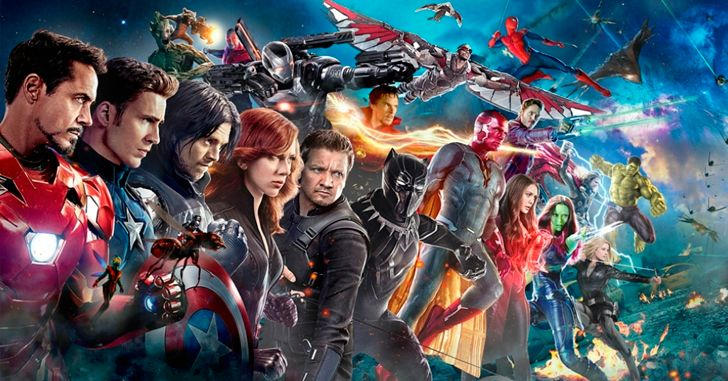

#**0. Introdução**

A análise abaixo foi realizada utilizando a base de dados do FiveThirtyEight hospedado no GitHub. Esse dataset contem informações sobre os Vingadores das HQs da Marvel.

O objetivo desse projeto é analisar padrões de tendências de entrada e saídas dos membros dos Vingadores ao longo do tempo.

Perguntas que tentarei responder com a análise:


*   Quantos personagens fizeram parte dos quadrinhos?
*   Qual a porcentagem de personagens masculinos e femininos?
*   Quais personagens tiveram mais aparições ao decorrer dos anos?
*   Qual a distribuição de genêro por década?
*   Quantos personagens morreram?
*   Quantos personagens ressuscitaram?



Fonte do dataset: https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-avengers-dataset





#**1. Importando as bibliotecas que serão utilizadas:**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#**2. Carregando o dataset:**

In [ ]:
df = pd.read_csv('/content/Five Thirty Eight - avengers.csv', encoding='ISO-8859-1')

In [ ]:
df

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**3. Explorando os dados:**

###O dataset contem 173 linhas e 21 colunas:

In [ ]:
df.shape

(173, 21)

##Descrição das colunas:

* HeaderDefinitionURL: A URL do personagem de quadrinhos na Marvel Wikia.

* Name/Alias: O nome completo ou pseudônimo do personagem.

* Appearances: O número de revistas em quadrinhos em que o personagem apareceu até 30 de abril.

* Current?: O membro está atualmente ativo em uma equipe afiliada aos Vingadores?

* Gender: O gênero registrado do personagem.

* Probationary: Às vezes, o personagem recebia status probatório como Vingador, esta é a data em que isso aconteceu.

* Full/Reserve: O mês e ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.

* Year: O ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.

* Years since joining: 2015 menos o ano.

* Honorary: O status do Vingador, se eles receberam o status de Vingador "Honorário", se estão simplesmente na "Academia" ou "Titular" caso contrário.

* Death1: Sim, se o Vingador morreu, Não, caso contrário.

* Return1: Sim, se o Vingador retornou de sua primeira morte, Não, caso contrário, em branco se não aplicável.

* Death2: Sim, se o Vingador morreu uma segunda vez após seu renascimento, Não, caso contrário, em branco se não aplicável.

* Return2: Sim, se o Vingador retornou de sua segunda morte, Não, caso contrário, em branco se não aplicável.

* Death3: Sim, se o Vingador morreu uma terceira vez após seu segundo renascimento, Não, caso contrário, em branco se não aplicável.

* Return3: Sim, se o Vingador retornou de sua terceira morte, Não, caso contrário, em branco se não aplicável.

* Death4: Sim, se o Vingador morreu uma quarta vez após seu terceiro renascimento, Não, caso contrário, em branco se não aplicável.

* Return4: Sim, se o Vingador retornou de sua quarta morte, Não, caso contrário, em branco se não aplicável.

* Death5: Sim, se o Vingador morreu uma quinta vez após seu quarto renascimento, Não, caso contrário, em branco se não aplicável.

* Return5: Sim, se o Vingador retornou de sua quinta morte, Não, caso contrário, em branco se não aplicável.

* Notes: Descrições de mortes e ressurreições.

In [ ]:
df.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

In [ ]:
df['Name/Alias'].count()

np.int64(163)

##Qual a distribuição de genêro dos personagens?

In [ ]:
contagem_genero = df['Gender'].value_counts()
contagem_genero

,count
Gender,
MALE,115
FEMALE,58


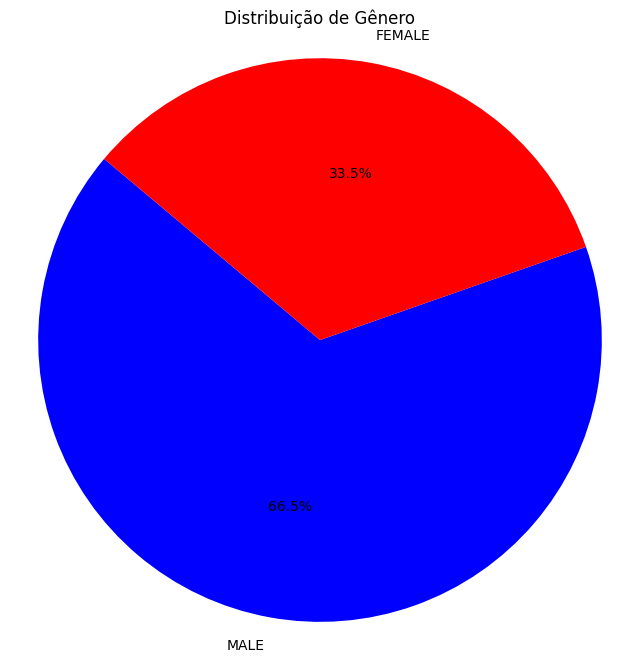

In [ ]:
cores = ['blue', 'red']  # Azul para masculino, vermelho para feminino

# Criar o gráfico de pizza com as cores especificadas
plt.figure(figsize=(8, 8))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição de Gênero')
plt.axis('equal')
plt.show()


####Percebemos que ao dercorrer dos anos, existiram 115 superheróis masculinos (que equivalem a 66.5% do total) e 58 superheróinas (que equivalem a 33.5% do total).

##Quantos  Vingadores receberam o status de Vingador "Honorário"? Quantos estão simplesmente na "Academia" ou "Titular"? E a diferença entre homens e mulheres?

Explicação:

"Honorary" → O Vingador recebeu o título de "Honorário", mas não é um membro pleno.

"Academy" → O Vingador faz parte da Academia, provavelmente ainda em treinamento.

"Full" → O Vingador é um membro titular (ou seja, faz parte oficialmente do time principal).

"Probationary" → O Vingador está em período de teste ou em avaliação antes de se tornar um membro oficial.

In [ ]:
df_honorary_gender = df.groupby("Gender")["Honorary"].value_counts(normalize=False).unstack()
df_honorary_gender

Honorary,Academy,Full,Honorary,Probationary
Gender,,,,
FEMALE,9.0,43.0,6.0,NaN
MALE,8.0,95.0,10.0,2.0


##Quais personagens mais tiveram aparições nos quadrinhos?

In [ ]:
aparições_por_nome = df.groupby('Name/Alias')['Appearances'].sum().sort_values(ascending=False)
aparições_por_nome

,Appearances
Name/Alias,
Peter Benjamin Parker,4333
Steven Rogers,3458
"James ""Logan"" Howlett",3130
"Anthony Edward ""Tony"" Stark",3068
Thor Odinson,2402
...,...
Dennis Sykes,6
Gene Lorrene,4
Doug Taggert,3


In [ ]:
aparições_por_nome_10 = df.groupby('Name/Alias')['Appearances'].sum().sort_values(ascending=False).head(10)
aparições_por_nome_10


,Appearances
Name/Alias,
Peter Benjamin Parker,4333
Steven Rogers,3458
"James ""Logan"" Howlett",3130
"Anthony Edward ""Tony"" Stark",3068
Thor Odinson,2402
Benjamin Jacob Grimm,2305
Reed Richards,2125
Robert Bruce Banner,2089
Henry P. McCoy,1886


### Os 10 personagens que mais tiveram aparições foram:


1.   Peter Benjamin Parker - Homem Aranha
2.   Steve Rogers - Capitão América
3.   James "Logan" Howlett - Wolverine
4.   Anthony Edward "Tony" Stark - Homem de Ferro
5.   Thor Odinson - Thor
6.   Benjamin Jacob Grimm - O Coisa
7.   Reed Richards - Senhor Fantástico
8.   Robert Bruce Banner - Hulk
9.   Henry P.McCcoy - Fera
10.  Susan Richards - Mulher Invisível



---




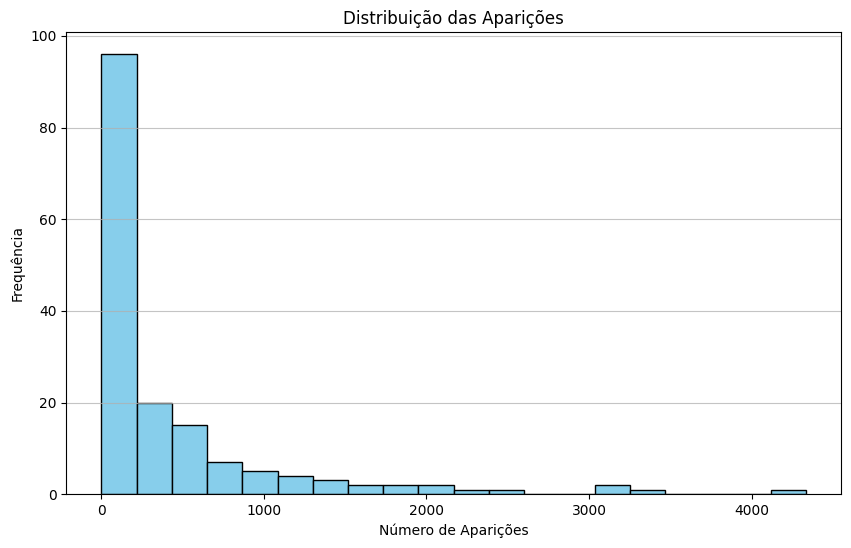

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(aparições_por_nome, bins=20, color='skyblue', edgecolor='black')  # Cria o histograma
plt.title('Distribuição das Aparições')
plt.xlabel('Número de Aparições')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)  # Adiciona grade no eixo y
plt.show()

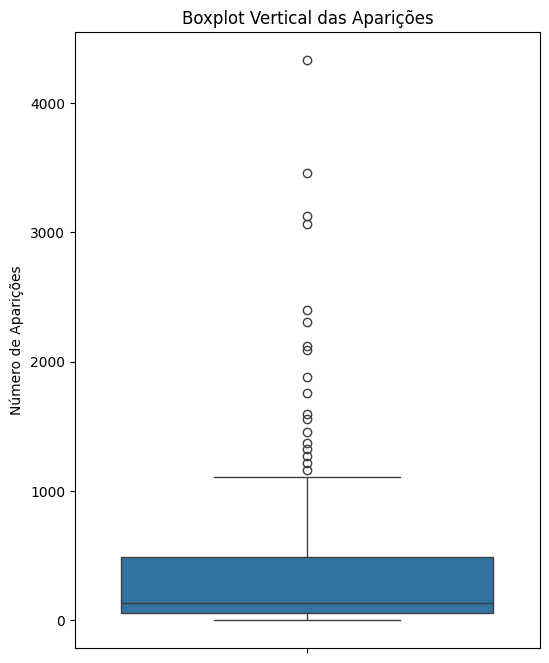

In [ ]:
plt.figure(figsize=(6, 8))  # Define o tamanho da figura
sns.boxplot(y=df['Appearances'])  # Cria o boxplot vertical
plt.title('Boxplot Vertical das Aparições')
plt.ylabel('Número de Aparições') #modificado para y label
plt.show()

###A partir do histograma e boxplot acima, podemos perceber que a maioria dos heróis teve no máximo 500 aparições.

##Qual a distribuição das aparições por gênero?

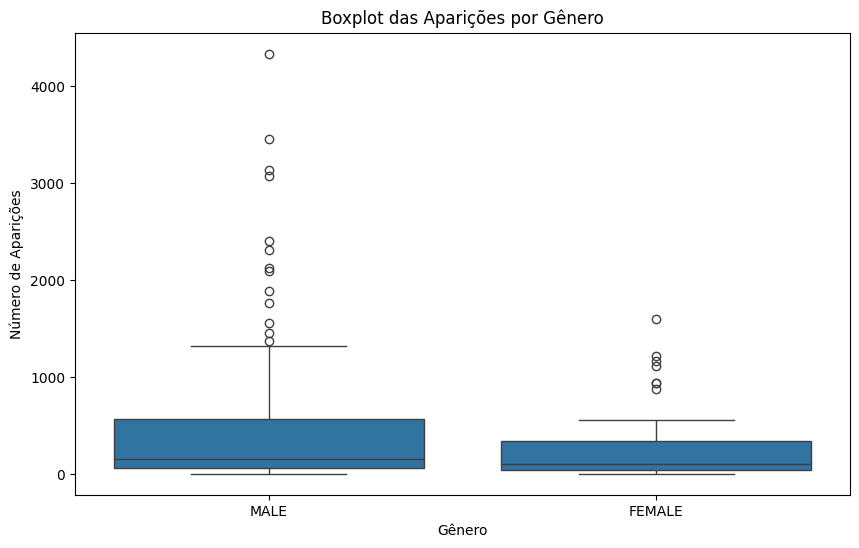

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.boxplot(x='Gender', y='Appearances', data=df)  # Cria o boxplot por gênero
plt.title('Boxplot das Aparições por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Aparições')
plt.show()

<Figure size 1200x600 with 0 Axes>

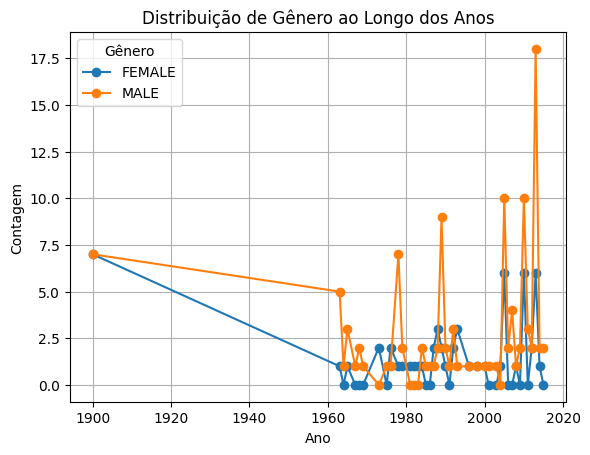

In [ ]:
# Agrupar por ano e gênero e contar as ocorrências
contagem_genero_ano = df.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
contagem_genero_ano.plot(kind='line', marker='o')  # Cria o gráfico de linha
plt.title('Distribuição de Gênero ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.grid(True)  # Adiciona grade
plt.legend(title='Gênero')
plt.show()

##Como se comporta as aparições ao decorrer dos anos?

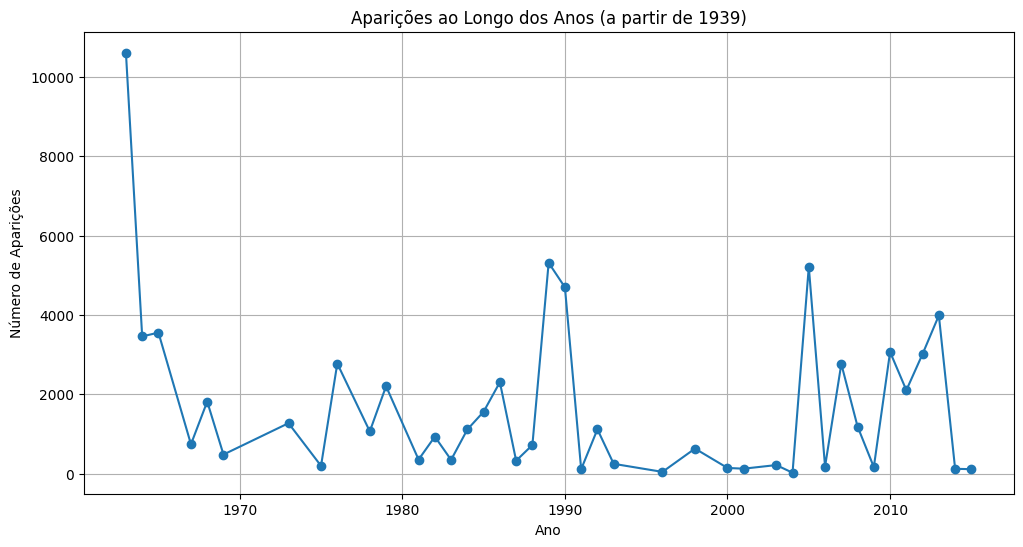

In [ ]:
df_filtrado = df[df['Year'] >= 1939]

# Agrupar por ano e somar as aparições
aparições_por_ano = df_filtrado.groupby('Year')['Appearances'].sum()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(aparições_por_ano.index, aparições_por_ano.values, marker='o')
plt.title('Aparições ao Longo dos Anos (a partir de 1939)')
plt.xlabel('Ano')
plt.ylabel('Número de Aparições')
plt.grid(True)
plt.show()

##A diferença das aparições entre os gêneros mudou ao decorrer dos anos?

<ipython-input-17-9ce70766105b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Decade'] = (df_filtrado['Year'] // 10) * 10


<Figure size 1500x800 with 0 Axes>

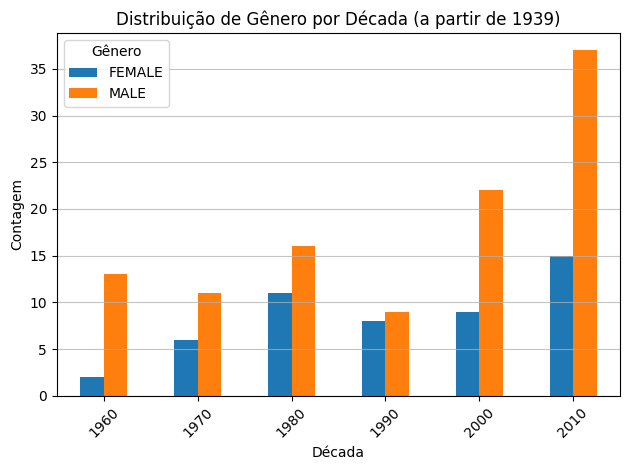

In [ ]:
# Criar coluna 'Decade'
df_filtrado['Decade'] = (df_filtrado['Year'] // 10) * 10

# Agrupar por décadas e gênero e contar as ocorrências
contagem_genero_decada = df_filtrado.groupby(['Decade', 'Gender']).size().unstack(fill_value=0)

# Criar o gráfico de barras vertical
plt.figure(figsize=(15, 8))
contagem_genero_decada.plot(kind='bar', stacked=False)  # stacked=False para barras lado a lado
plt.title('Distribuição de Gênero por Década (a partir de 1939)')
plt.xlabel('Década')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

Pode-se notar que o numero de personagens da Marvel vinha crescendo ao decorrer dos anos, tendo um decréscimo na década de 90. Isso pode ter ocorrido pela dimuinção do consumo por quadrinhos ou uma estrategia da Marvel de diminuir o numero de personagens. Notamos que a partir do ano 2000 a diferença entre herois masculinos e femininos se tornou ainda mais discrepante, sendo os personagens homens os heróis de maior frequência sempre.

##Qual o numero total de personagens que morreram pelo menos uma vez? E que ressuscitaram?

In [ ]:
# Lista das colunas de morte e retorno
death_cols = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
return_cols = ['Return1', 'Return2', 'Return3', 'Return4', 'Return5']

# 1. Contar quantos personagens morreram pelo menos uma vez
# Verifica se 'YES' aparece em qualquer coluna de morte para cada linha (personagem)
morreu_pelo_menos_uma_vez = df[death_cols].eq('YES').any(axis=1)
# Conta quantos personagens morreram (quantos True existem na série resultante)
total_mortes = morreu_pelo_menos_uma_vez.sum()
# 2. Contar quantos personagens retornaram da morte pelo menos uma vez
# Verifica se 'YES' aparece em qualquer coluna de retorno para cada linha
retornou_pelo_menos_uma_vez = df[return_cols].eq('YES').any(axis=1)
# Conta quantos personagens retornaram (quantos True existem na série resultante)
total_retornos = retornou_pelo_menos_uma_vez.sum()
# Imprimir os resultados
print(f"Número total de personagens que morreram pelo menos uma vez: {total_mortes}")
print(f"Número total de personagens que retornaram da morte pelo menos uma vez: {total_retornos}")



Número total de personagens que morreram pelo menos uma vez: 69
Número total de personagens que retornaram da morte pelo menos uma vez: 46


Número total de personagens que morreram pelo menos uma vez: 69

Número total de personagens que retornaram da morte pelo menos uma vez: 46

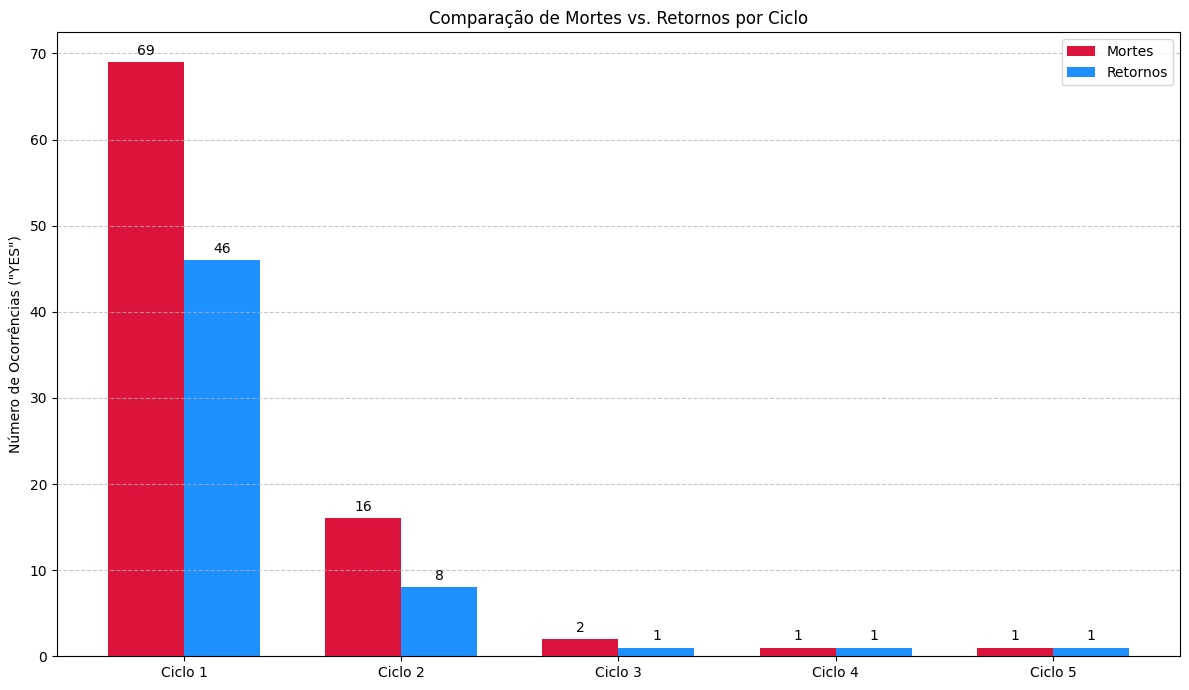

In [ ]:
# 1. Calcular as contagens para cada coluna Death e Return
rounds = range(1, 6) # Ciclos 1, 2, 3, 4, 5
death_counts_per_round = []
return_counts_per_round = []

for i in rounds:
    death_col = f'Death{i}'
    return_col = f'Return{i}'

    # Conta 'YES' na coluna de morte do ciclo atual
    # Verifica se a coluna existe antes de contar
    death_count = df[death_col].eq('YES').sum() if death_col in df.columns else 0
    death_counts_per_round.append(death_count)

    # Conta 'YES' na coluna de retorno do ciclo atual
    # Verifica se a coluna existe antes de contar
    return_count = df[return_col].eq('YES').sum() if return_col in df.columns else 0
    return_counts_per_round.append(return_count)

# print(f"Contagens de Mortes (Ciclos 1-5): {death_counts_per_round}")
# print(f"Contagens de Retornos (Ciclos 1-5): {return_counts_per_round}")

# 2. Preparar dados para o gráfico
labels = [f'Ciclo {i}' for i in rounds] # Rótulos para o eixo X (Death1/Return1, Death2/Return2, etc.)
x = np.arange(len(labels))  # Posições numéricas para os grupos de barras no eixo X
width = 0.35  # Largura das barras

# 3. Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7)) # Cria a figura e os eixos (ajuste figsize se necessário)

# Barras para as mortes (ligeiramente à esquerda do centro de cada grupo)
rects1 = ax.bar(x - width/2, death_counts_per_round, width, label='Mortes', color='crimson')

# Barras para os retornos (ligeiramente à direita do centro de cada grupo)
rects2 = ax.bar(x + width/2, return_counts_per_round, width, label='Retornos', color='dodgerblue')

# 4. Adicionar títulos, rótulos e legenda
ax.set_ylabel('Número de Ocorrências ("YES")')
ax.set_title('Comparação de Mortes vs. Retornos por Ciclo')
ax.set_xticks(x) # Define as posições dos rótulos no eixo X
ax.set_xticklabels(labels) # Define os textos dos rótulos no eixo X
ax.legend() # Mostra a legenda (Mortes/Retornos)

# 5. (Opcional) Adicionar os valores exatos no topo das barras
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# 6. Ajustar layout e mostrar o gráfico
fig.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade horizontal para facilitar leitura
plt.show() # Exibe o gráfico gerado

##Qual foi o personagem que morreu e ressuscitou 5 vezes?

In [ ]:
# Lista das colunas de morte e retorno
death_cols = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
return_cols = ['Return1', 'Return2', 'Return3', 'Return4', 'Return5']
name_column = 'Name/Alias' # Garanta que este seja o nome exato da sua coluna

# 1. Calcular o número total de mortes por personagem
num_deaths = df[death_cols].eq('YES').sum(axis=1)

# 2. Calcular o número total de retornos por personagem
num_returns = df[return_cols].eq('YES').sum(axis=1)

# 3. Criar a condição de filtro: morrer 5 vezes E retornar 5 vezes
condicao = (num_deaths == 5) & (num_returns == 5)

# 4. Aplicar o filtro e selecionar a coluna com os nomes
personagens_filtrados = df.loc[condicao, name_column]

# 5. Exibir os resultados
if not personagens_filtrados.empty:
    print("Personagem(ns) que morreu(ram) 5 vezes E retornou(ram) 5 vezes:")
    # Itera sobre a Series resultante e imprime cada nome
    for nome in personagens_filtrados:
        print(f"- {nome}")
else:
    print("Nenhum personagem encontrado que atenda aos critérios (morreu 5 vezes E retornou 5 vezes).")


Personagem(ns) que morreu(ram) 5 vezes E retornou(ram) 5 vezes:
- Jocasta


###A personagem que morreu e ressuscitou 5 vezes foi a Jocasta.

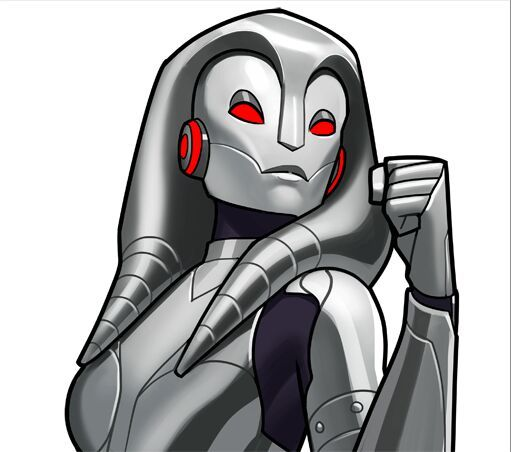

